# Introduction
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

**What?** Nested versus non-nested cross-validation

</font>
</div>

# Import modules
<hr style="border:2px solid black"> </hr>

In [2]:
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
import numpy as np
from pylab import rcParams
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Load dataset
<hr style="border:2px solid black"> </hr>

In [3]:
# Number of random trials
NUM_TRIALS = 30

# Load the dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Set up possible values of parameters to optimize over
p_grid = {"C": [1, 10, 100],
          "gamma": [.01, .1]}

# Build the model
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- The example below uses a support vector classifier with a non-linear kernel to build a model with optimised hyperparameters by grid search. 
- We compare the performance of non-nested and nested CV strategies by taking the difference between their scores  

</font>
</div>

In [5]:
# We will use a Support Vector Classifier with "rbf" kernel
svm = SVC(kernel="rbf")

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

# Non-nested vs. nested CVs
<hr style="border:2px solid black"> </hr>

<div class="alert alert-info">
<font color=black>

- **NON-NESTED** = estimates the generalization error of the underlying model and its (hyper)parameter search.
Model selection without nested CV uses the same data to tune model parameters and evaluate model performance. 
Information may thus “leak” into the model and overfit the data. The magnitude of this effect is primarily 
dependent on the size of the dataset and the stability of the model. Choosing the parameters that maximize 
non-nested CV biases the model to the dataset, yielding an overly-optimistic score.


- **NESTED** = cross-validation (CV) is often used to train a model in which hyperparameters also need to be optimized. 
To avoid this problem, nested CV effectively uses a series of train/validation/test set splits. In the inner loop
(here executed by GridSearchCV), the score is approximately maximized by fitting a model to each training set, and
then directly maximized in selecting (hyper)parameters over the validation set. In the outer loop (here in 
cross_val_score), generalization error is estimated by averaging test set scores over several dataset splits

</font>
</div>

In [6]:
# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "GroupKFold", "LeaveOneOut", "LeaveOneGroupOut", etc.
    inner_cv = KFold(n_splits=4, shuffle=True, random_state=i)
    outer_cv = KFold(n_splits=4, shuffle=True, random_state=i)

    # NON-NESTED parameter search and scoring
    # ========================================
    clf = GridSearchCV(estimator=svm, param_grid=p_grid, cv=inner_cv)
    clf.fit(X_iris, y_iris)
    non_nested_scores[i] = clf.best_score_

    # NESTED CV with parameter optimisation
    # ======================================
    nested_score = cross_val_score(clf, X=X_iris, y=y_iris, cv=outer_cv)
    nested_scores[i] = nested_score.mean()

score_difference = non_nested_scores - nested_scores

print("Average difference of {:6f} with std. dev. of {:6f}."
      .format(score_difference.mean(), score_difference.std()))

Average difference of 0.007581 with std. dev. of 0.007833.


<Figure size 432x288 with 0 Axes>

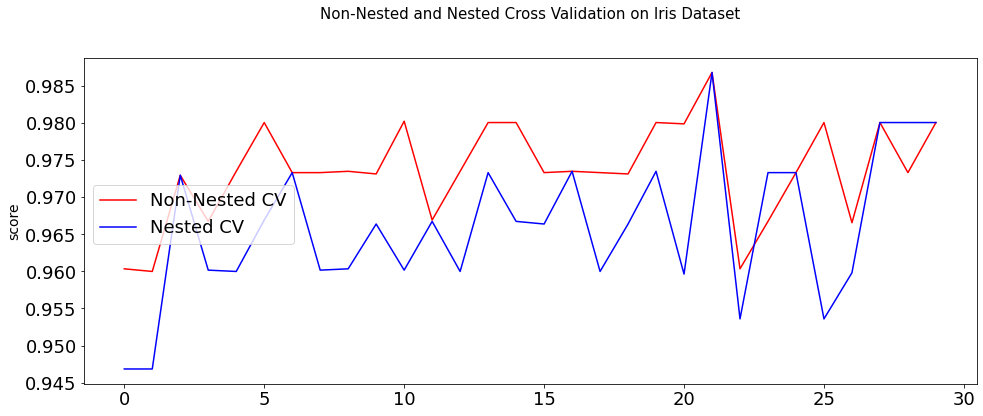

In [7]:
# Plot scores on each trial for nested and non-nested CV
plt.figure()
rcParams['font.size'] = 18
fig, ax = plt.subplots(figsize=(16,6))
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Iris Dataset",
          x=.5, y=1.1, fontsize="15")
plt.show()

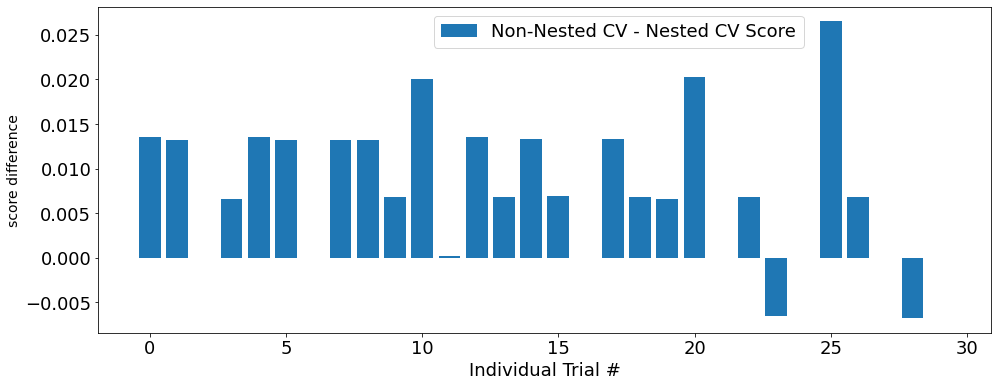

In [8]:
# Plot bar chart of the difference.
rcParams['font.size'] = 18
fig, ax = plt.subplots(figsize=(16,6))
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()

# References
<hr style="border:2px solid black"> </hr>

<div class="alert alert-warning">
<font color=black>

- https://scikit-learn.org/stable/auto_examples/model_selection/plot_nested_cross_validation_iris.html#sphx-glr-auto-examples-model-selection-plot-nested-cross-validation-iris-py

</font>
</div>